# Introduction: Crop Recommendation System.

Agriculture remains a backbone of the economy in many African countries, especially in Kenya, where over 75% of the population relies on farming for their livelihoods. Despite this, the agricultural sector is riddled with challenges, including erratic weather patterns, poor soil conditions, and limited access to critical farming data. These factors contribute to low yields, food insecurity, and hunger across the region. According to the United Nations, an estimated **239 million people** in sub-Saharan Africa are facing hunger, a number that has been exacerbated by climate change and inefficient farming practices.

In this project, I present a **machine learning-based Crop Recommendation System** using data provided by **Kaggle**, aimed at addressing these agricultural challenges. By leveraging data on soil conditions, weather, and environmental factors, this system recommends the most suitable crops to plant in a given region. Such models could potentially revolutionize farming practices by providing farmers with actionable insights tailored to their unique environment, thereby improving crop yields and contributing to long-term food security.

### Why This Project Matters

Machine learning, when applied to agriculture, has the potential to be a game-changer, particularly for small-scale farmers who often lack the resources or knowledge to make data-driven decisions. A well-implemented crop recommendation system can:
- **Optimize Crop Yields:** By analyzing key features like soil pH, rainfall, and temperature, the model can suggest crops that are most likely to thrive, thus reducing the risk of failed harvests.
- **Increase Sustainability:** By helping farmers choose the right crops, the system promotes efficient land use, reducing over-farming and preserving soil health.
- **Combat Food Insecurity:** In regions like the Horn of Africa, where hunger crises persist, implementing these systems on a larger scale could help address the root causes of food shortages.

### Scope of This Notebook

In this notebook, I will walk through the process of building a machine learning model for crop recommendation using data from various environmental factors. The key stages include:
- **Data Preprocessing:** Handling missing values, scaling numerical features, and encoding categorical variables.
- **Feature Engineering:** Creating new features that could enhance model performance, such as a drought risk index.
- **Model Selection and Evaluation:** Comparing the performance of different classification algorithms (mainly Random Forest & SVM) to determine the most effective model.
- **Data Visualization:** Gaining insights into the relationships between environmental factors and crop types through data visualizations.

This project not only highlights my technical skills in data science and machine learning but also demonstrates how these technologies can be applied to real-world problems like hunger and food insecurity. By combining **agriculture with artificial intelligence**, we take a step closer to solving one of the greatest challenges facing humanity today—ensuring that everyone has enough to eat.

### Potential Impact

If deployed on a national or regional scale, models like this could empower farmers with the knowledge needed to make informed decisions, leading to:
- **Reduced Hunger:** Increased crop yields translate directly into more food for local communities.
- **Improved Livelihoods:** By optimizing crop selection, farmers can grow crops that provide better yields and higher economic returns.
- **Environmental Sustainability:** Encouraging the right crop choices based on environmental conditions reduces the stress on natural resources and promotes sustainable farming.

With the right support, tools like the **shambasmart Crop Recommendation System** could play a vital role in addressing hunger crises not just in Kenya, but across Africa and the world.

In [29]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# Loading the dataset 
df = pd.read_csv('Crop_recommendation.csv')

Inspecting the dataset.

In [31]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [33]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

ydata profileReport for deeper insights.

In [34]:
# profile report to generate detailed analysis of our df
profile = ProfileReport(df, title="Crop Recommendation Dataset report", explorative=True)

In [35]:
# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# The dataset from kaggle looks very balanced.

Data Preprocessing

In [36]:
# no missing values or duplicates
# encoding categorical features.

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'label' column
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# View the transformed data
df[['label', 'label_encoded']].tail()

label  label_encoded
2195  coffee              5
2196  coffee              5
2197  coffee              5
2198  coffee              5
2199  coffee              5

In [37]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'label_encoded'],
      dtype='object')

In [38]:
# feature scaling(to improve model performance for sensitive algorithms such as svm)
# Selecting numerical features for scaling
numerical_features = ['rainfall', 'temperature', 'ph', 'humidity']

# Initializing the scaler
scaler = StandardScaler()

# Applying scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [39]:
# feature engineering to add key features to the dataset.
# Creating a new feature 'drought_risk'
df['drought_risk'] = df['rainfall'] / df['temperature']

In [40]:
# Creating another feature 'soil_suitability_score'
df['soil_suitability_score'] = df['ph'] * df['rainfall']

###  Added Features;

1. **`drought_risk`:** 
   - This feature is calculated by dividing `rainfall` by `temperature`. It acts as an indicator of the risk of drought in the region. Lower values suggest higher drought risk (low rainfall relative to high temperature), while higher values suggest lower drought risk.
   - **Purpose:** Helps the model predict how well crops can perform under varying drought conditions, guiding recommendations towards drought-resistant crops when necessary.

2. **`soil_suitability_score`:**
   - This feature is derived from multiplying `ph_level` by `rainfall`. It reflects the suitability of the soil based on its pH and water availability, with higher scores indicating better growing conditions.
   - **Purpose:** Aids the model in evaluating the fertility of the soil and water availability, helping identify crops that are more likely to thrive in those conditions.

### Feature Engineering Summary
1. **`elevation`:** 
   - **(Data required):** This feature could directly measure the altitude of the farm's location, influencing temperature and humidity levels.
   - **Next Step:** Add geographical data for elevation to account for climate variations across regions.

2. **`elevation_temperature_adjustment`:** 
   - **(Data required):** This feature would adjust temperature based on elevation, as higher elevations are typically cooler, influencing crop growth.
   - **Next Step:** Collect elevation data for each region to create this feature.

3. **`seasonal_rainfall_ratio`:** 
   - **(Data required):** This feature would be the ratio of rainfall received during the planting season to total annual rainfall, important for crops dependent on seasonal rains.
   - **Next Step:** Gather data on seasonal rainfall to calculate this ratio.

4. **`irrigation_availability`:** 
   - **(Data required):** A binary feature indicating whether irrigation is available for the farm, improving crop performance in areas with low rainfall.
   - **Next Step:** Collect data on the availability of irrigation systems in different regions.

6. **`soil_texture`:** 
   - **(Data required):** A categorical feature representing the soil type (e.g., sandy, loamy, clay), which impacts water retention and root growth.
   - **Next Step:** Gather soil texture data for different regions to better tailor crop recommendations.

7. **`pest_risk` and `disease_risk`:** 
   - **(Data required):** These features would assess the likelihood of pest infestations and crop diseases in specific areas.
   - **Next Step:** Collect data on pest and disease occurrences to identify resilient crop varieties.

8. **`market_accessibility`:** 
   - **(Data required):** A feature representing the distance to markets or distribution centers, which could influence the economic feasibility of certain crops.
   - **Next Step:** Add data on proximity to markets to better predict crops' economic viability.

### Conclusion:
The current dataset provides a solid foundation with some engineered features like `soil_suitability_score`. However, the dataset lacks critical information like elevation, seasonal rainfall, soil texture, pest and disease risk, and irrigation availability, which are essential for improving the model's accuracy. Further data collection in these areas would greatly enhance crop recommendations by addressing key environmental and logistical factors relevant to farming in Kenya.

In [41]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'label_encoded', 'drought_risk', 'soil_suitability_score'],
      dtype='object')

# Data visualisation to uncover insights.

/var/folders/js/8bnyws5d18x0g67dk4jcfp8w0000gn/T/ipykernel_4613/4109006786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='label', palette=sns.cubehelix_palette(light=0.8, dark=0.2, reverse=True, n_colors=len(df['label'].unique())))


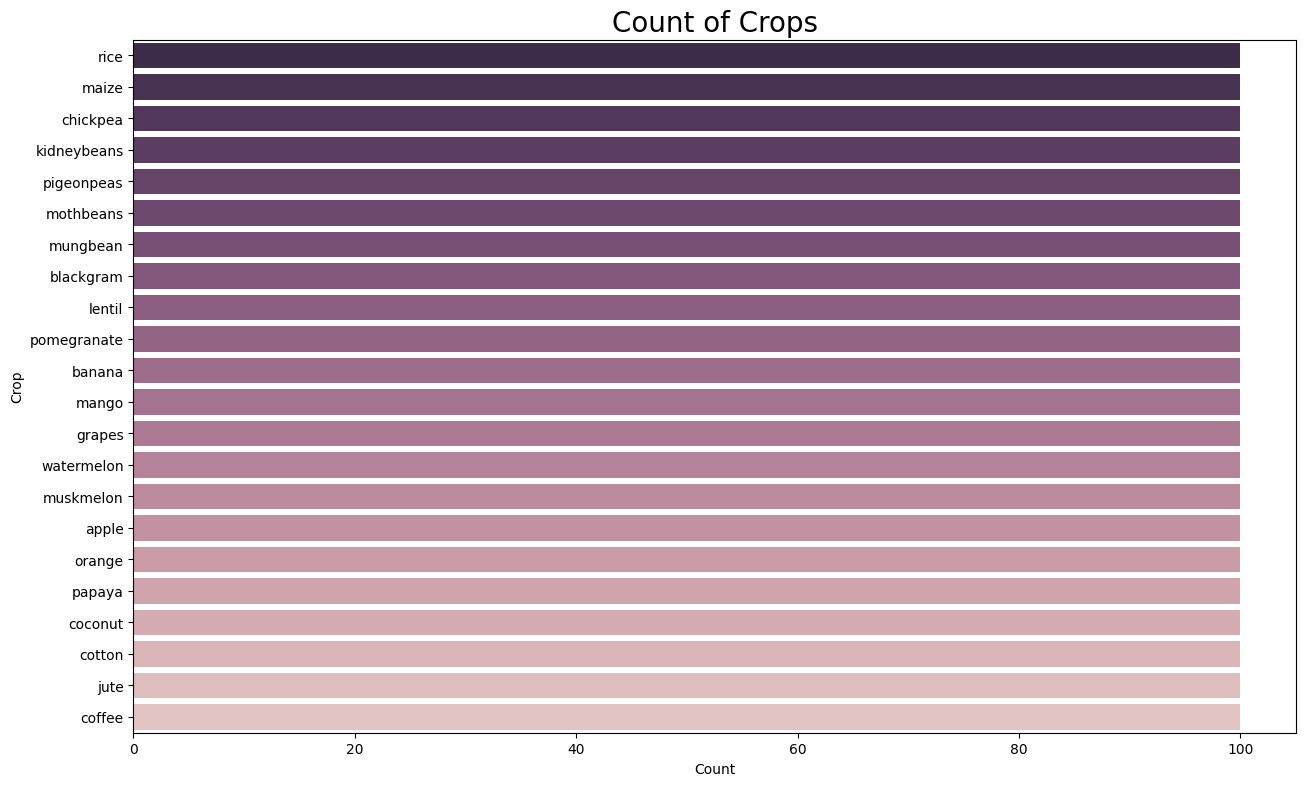

In [42]:
# crop distribution
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.countplot(data=df, y='label', palette=sns.cubehelix_palette(light=0.8, dark=0.2, reverse=True, n_colors=len(df['label'].unique())))
ax.set(xlabel='Count', ylabel='Crop') # cubehelix for better colours on the bar plot

plt.title('Count of Crops', fontsize=20, c='black')
plt.show()

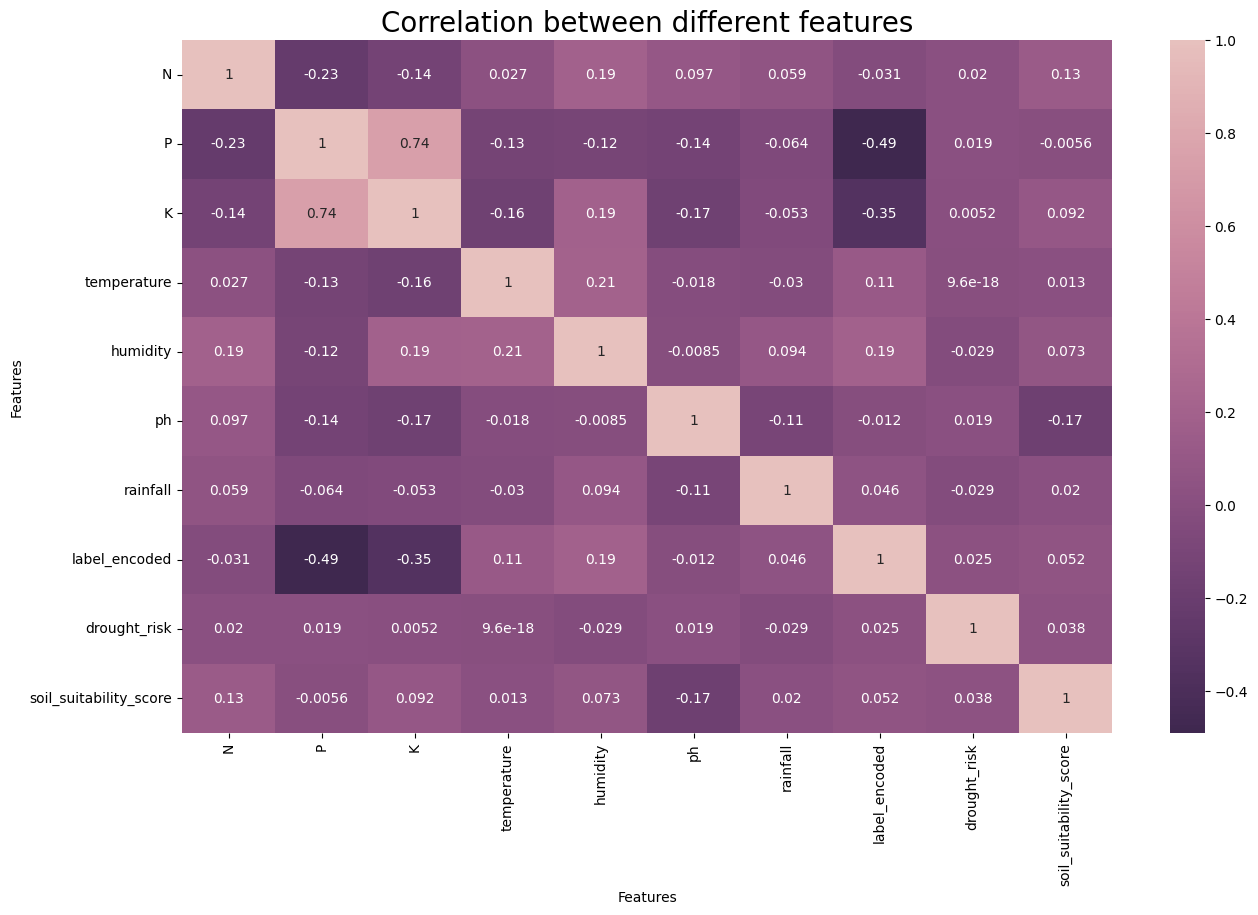

In [43]:
# heatmap for further correlation analysis between features

# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

fig, ax = plt.subplots(1, 1, figsize=(15, 9))

# Using the cubehelix_palette in the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap=sns.cubehelix_palette(light=0.8, dark=0.2, reverse=True, as_cmap=True))

ax.set(xlabel='Features', ylabel='Features')
plt.title('Correlation between different features', fontsize=20, c='black')
plt.show()

Only P and k have a strong correlation other features are potraying weak correlations.

# Model(s) Selection and Building

Chosen Models:

1. Random Forest: Chosen for its robustness and ability to handle large datasets with a mix of numerical and categorical data.
2. Support Vector Machine (SVM): Used for its high accuracy in classification tasks, especially when fine-tuned.

Model Selection Reasoning: Random Forest performed best in handling complex interactions between the variables, which is essential for agricultural data that can have many dependencies.

In [44]:
# Dropping the 'label' column in place
df.drop(columns=['label'], inplace=True)

In [45]:
# data splitting

# Splitting the data into features and target
X = df.drop('label_encoded', axis=1)  # features
y = df['label_encoded']  # target

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RandomForest Classifier

In [46]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred_rf = rf_model.predict(X_test)

Support Vector Machine (SVM)

In [47]:
# Initialize the SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predicting on test data
y_pred_svm = svm_model.predict(X_test)

# Model(s) Evaluation

In [51]:
# Evaluating the Random Forest model

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.990909090909091
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.87      1.00      0.93        34
           9       1.00      1.00      1.00        36
          10       0.96      1.00      0.98        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      0.97      0.99        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
 

In [52]:
# # SVM model Evaluation

# print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
# print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Model Performance Comparison: Random Forest vs. SVM

## Random Forest Results

- **Accuracy**: 0.9909 (99.09%)
- **Classification Report**:
  - **Precision, Recall, F1-Score**: The model achieved perfect scores (1.00) for almost all classes except for class 8 (precision: 0.87) and class 10 (precision: 0.96), indicating it correctly identified most instances of each crop type.
  - The **macro average** and **weighted average** scores were also very high (0.99), signifying that the model performed consistently well across all classes.

### Interpretation:
The Random Forest model demonstrated exceptional performance, correctly classifying the majority of crop types in the dataset. This high accuracy and strong classification metrics suggest that the model is effective for the crop recommendation task, likely due to its ability to handle the complexities and interactions within the data.

## SVM Results

- **Accuracy**: 0.5879 (58.79%)
- **Classification Report**:
  - The precision and recall for several classes were poor, especially for classes 0, 2, and 9, with many metrics showing scores close to zero. For example, class 0 had a precision and recall of 0.00, indicating that the SVM model failed to identify any instances of this crop.
  - The macro average precision was only 0.56, and the weighted average precision was 0.56, which reflects significant inconsistencies in performance across different classes.

### Interpretation:
The SVM model's performance was considerably weaker compared to the Random Forest model. The low accuracy and poor classification metrics highlight challenges in effectively predicting crop types with this algorithm. The SVM struggles with the multi-class nature of the problem and may require more careful tuning of hyperparameters or feature selection to improve its performance.

## Suggestions for Improvement

1. **Hyperparameter Tuning**: For the SVM model, consider performing grid search or randomized search for hyperparameter tuning to find optimal settings that might enhance its performance.
2. **Feature Selection**: Investigate the importance of features used in both models. Removing irrelevant features may improve model performance.
3. **Ensemble Techniques**: Experiment with ensemble methods that combine multiple models, including SVM and Random Forest, to leverage their strengths.

## Conclusion

In conclusion, the Random Forest model outperformed the SVM model in the crop recommendation task, achieving high accuracy and robust classification metrics. This indicates that Random Forest is more suitable for this dataset and problem type. The significant discrepancy in performance between the two models suggests that while SVM can be powerful in certain contexts, its application to multi-class classification problems like crop recommendations may require more extensive optimization and tuning. Future work should focus on improving the SVM model and exploring additional features or models to further enhance prediction accuracy.


In [55]:
# saving trained model for later deployment via streamlit

import pickle
model = rf_model
# our trained Random Forest
with open('crop_recommender_model.pkl', 'wb') as file:
    pickle.dump(model, file)
